# Importing libraries

In [155]:
# Importing necessary libraries
import pandas as pd
from nltk import DecisionTreeClassifier
from nltk.classify.svm import SvmClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Function to preprocess the dataset (handle missing values, scaling, train/test split)


In [156]:
def preprocess_data(dataset, target_column):
    # Drop rows with missing target values (if any)
    dataset = dataset.dropna(subset=[target_column])

    # Separating the features (X) and target (y)
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features (scale the data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Function to evaluate models using precision, recall, f1 score, and other metrics


In [157]:
def evaluate_model(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred.round(), average='weighted', zero_division=1)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return precision, recall, f1, mse, r2


# Load the datasets


In [158]:
dataset_kc1 = pd.read_csv('csv_result-KC1.csv')
dataset_mw1 = pd.read_csv('csv_result-MW1.csv')
dataset_pc5 = pd.read_csv('csv_result-PC5.csv')
dataset_mc1 = pd.read_csv('csv_result-MC1.csv')


# Preprocess the KC1, JM1, PC5, MC1 datasets

In [159]:
X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1 = preprocess_data(dataset_kc1, 'Defective')
X_train_mw1, X_test_mw1, y_train_mw1, y_test_mw1 = preprocess_data(dataset_mw1, 'Defective')
X_train_pc5, X_test_pc5, y_train_pc5, y_test_pc5 = preprocess_data(dataset_pc5, 'Defective')
X_train_mc1, X_test_mc1, y_train_mc1, y_test_mc1 = preprocess_data(dataset_mc1, 'Defective')


# Dictionary to store results for both datasets

In [160]:
results_kc1 = {}
results_mw1 = {}
results_pc5 = {}
results_mc1 = {}

# Models to be applied


In [161]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM Regression': SVC(kernel='linear'),
    'Decision Tree Classification': DecisionTreeClassifier(criterion='entropy'),
    'Random Forest Classification': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate each model for the KC1 dataset


In [162]:
for model_name, model in models.items():
    model.fit(X_train_kc1, y_train_kc1)
    y_pred = model.predict(X_test_kc1)
    results_kc1[model_name] = evaluate_model(y_test_kc1, y_pred)

# Train and evaluate each model for the MW1 dataset

In [163]:
for model_name, model in models.items():
    model.fit(X_train_mw1, y_train_mw1)
    y_pred = model.predict(X_test_mw1)
    results_mw1[model_name] = evaluate_model(y_test_mw1, y_pred)

# Train and evaluate each model for the PC5 dataset

In [164]:
for model_name, model in models.items():
    model.fit(X_train_pc5, y_train_pc5)
    y_pred = model.predict(X_test_pc5)
    results_pc5[model_name] = evaluate_model(y_test_pc5, y_pred)

/home/akash-soam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Train and evaluate each model for the MC1 dataset

In [165]:
for model_name, model in models.items():
    model.fit(X_train_mc1, y_train_mc1)
    y_pred = model.predict(X_test_mc1)
    results_mc1[model_name] = evaluate_model(y_test_mc1, y_pred)

/home/akash-soam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Convert results to DataFrame for easy comparison

In [166]:
results_kc1_df = pd.DataFrame(results_kc1, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
results_mw1_df = pd.DataFrame(results_mw1, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
results_pc5_df = pd.DataFrame(results_pc5, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
results_mc1_df = pd.DataFrame(results_mc1, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
print("KC1 Dataset Results:\n", results_kc1_df)
print("\nMW1 Dataset Results:\n", results_mw1_df)
print("\nPC1 Dataset Results:\n", results_pc5_df)
print("\nMC1 Dataset Results:\n", results_mc1_df)

KC1 Dataset Results:
            Logistic Regression  SVM Regression  Decision Tree Classification  \
Precision             0.801150        0.769925                      0.812175   
Recall                0.838863        0.831754                      0.827014   
F1 Score              0.801022        0.775415                      0.818266   
MSE                   0.161137        0.168246                      0.172986   
R2 Score             -0.178142       -0.230119                     -0.264770   

           Random Forest Classification  
Precision                      0.831596  
Recall                         0.853081  
F1 Score                       0.834089  
MSE                            0.146919  
R2 Score                      -0.074188  

MW1 Dataset Results:
            Logistic Regression  SVM Regression  Decision Tree Classification  \
Precision             0.854701        0.853776                      0.890947   
Recall                0.888889        0.876543                

# Plot the comparison of F1 Score for all 4 datasets


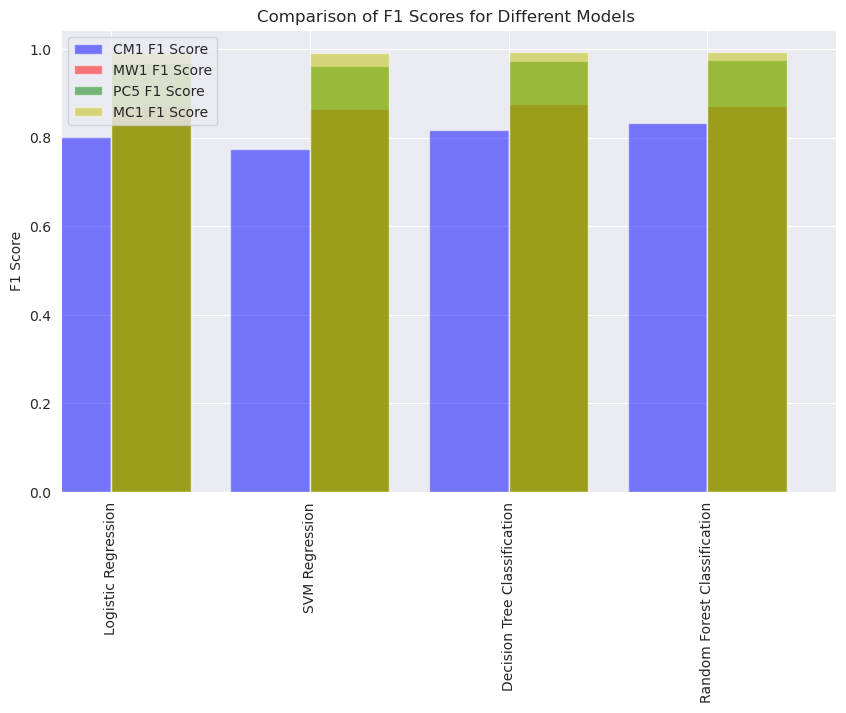

In [167]:
fig, ax = plt.subplots(figsize=(10, 6))
results_kc1_df.loc['F1 Score'].plot(kind='bar', color='b', alpha=0.5, ax=ax, position=1, width=0.4, label='CM1 F1 Score')
results_mw1_df.loc['F1 Score'].plot(kind='bar', color='r', alpha=0.5, ax=ax, position=0, width=0.4, label='MW1 F1 Score')
results_pc5_df.loc['F1 Score'].plot(kind='bar', color='g', alpha=0.5, ax=ax, position=0, width=0.4, label='PC5 F1 Score')
results_mc1_df.loc['F1 Score'].plot(kind='bar', color='y', alpha=0.5, ax=ax, position=0, width=0.4, label='MC1 F1 Score')

plt.title("Comparison of F1 Scores for Different Models ")
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# Plot the comparison of Precision, Recall, F1 Score, MSE, and R2 Score for all 4 datasets


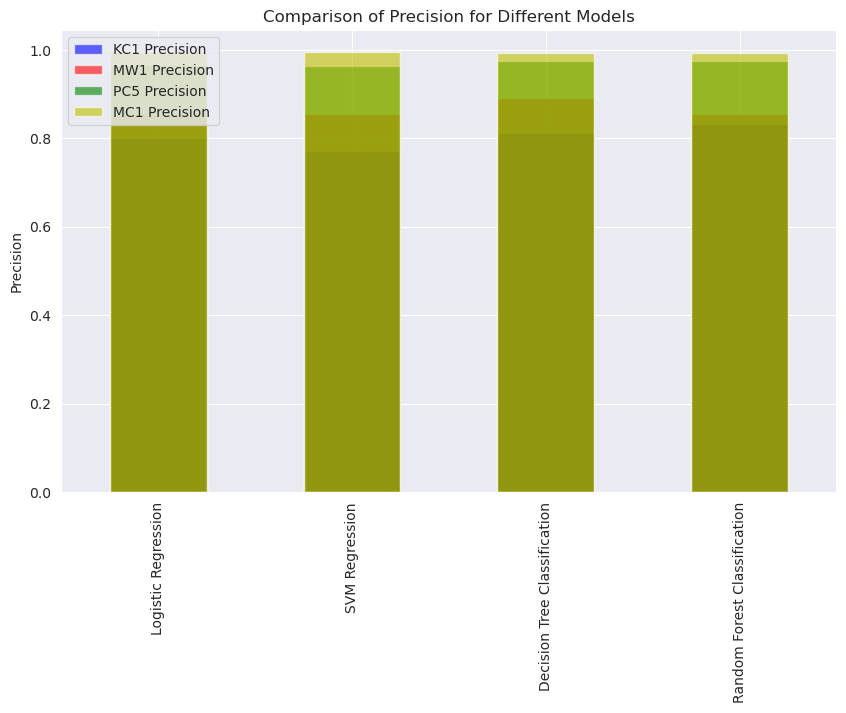

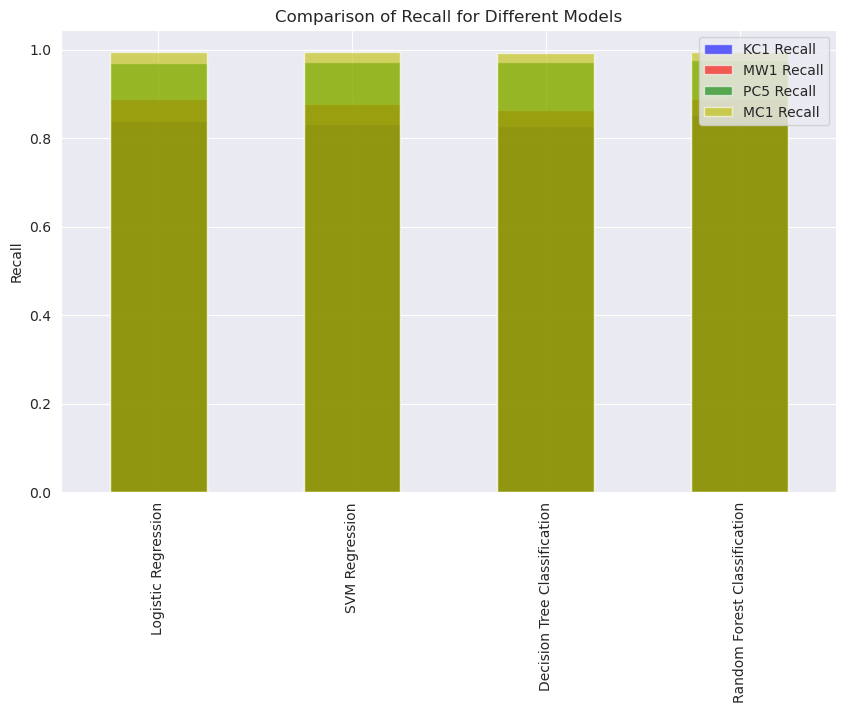

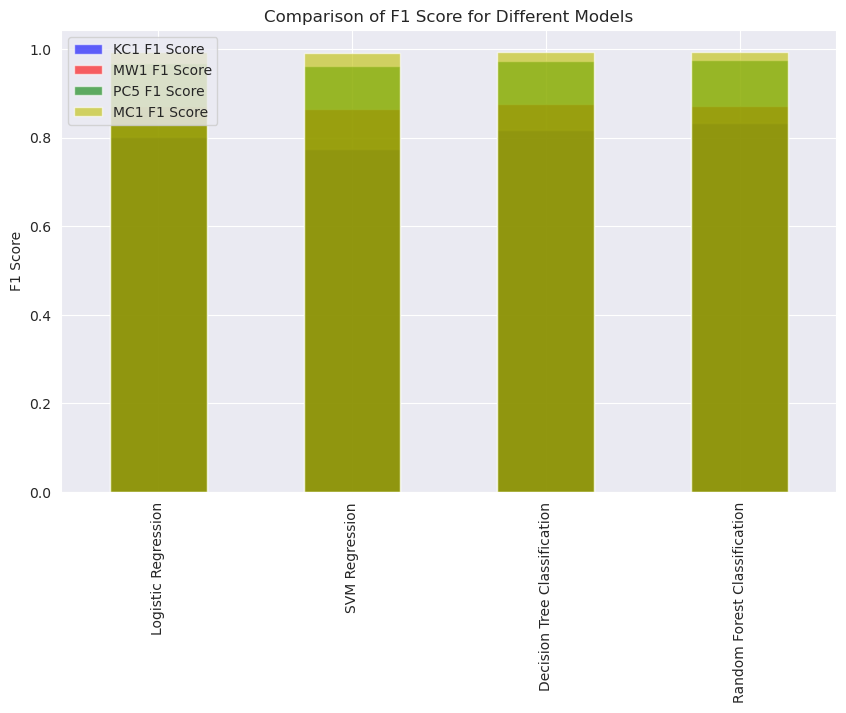

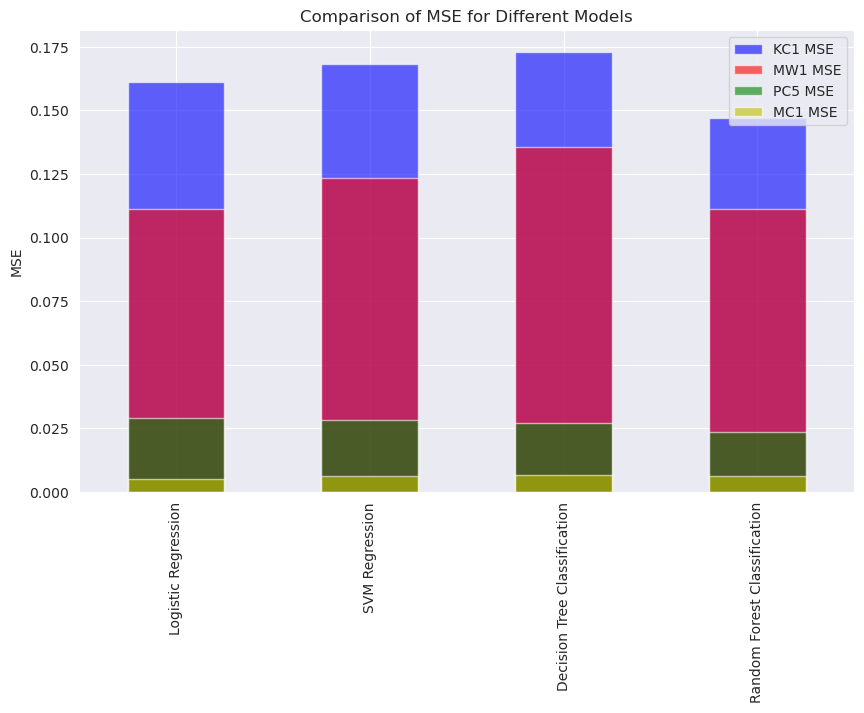

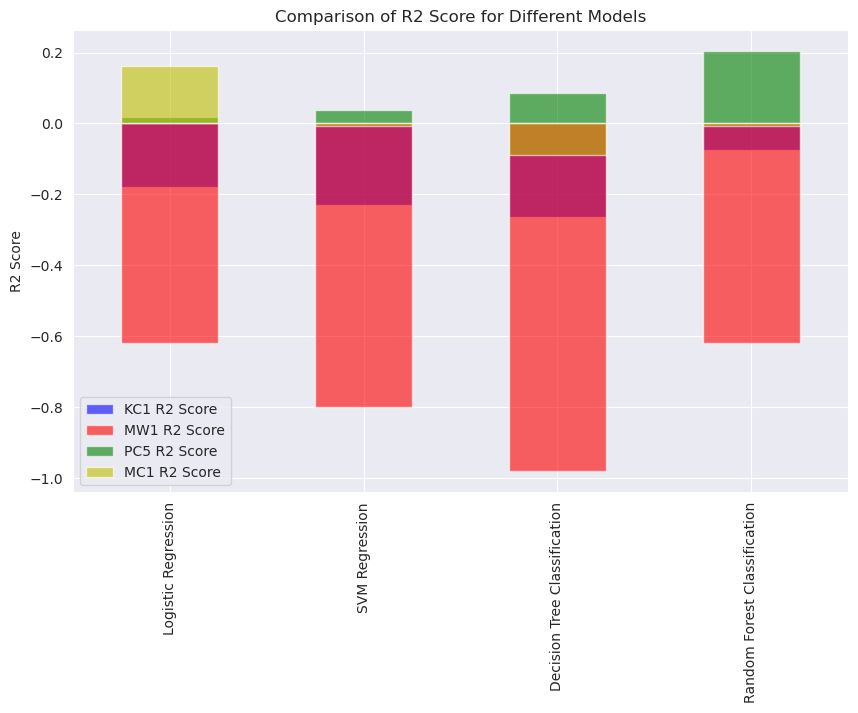

In [168]:
# Define the metrics and datasets
metrics = ['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score']
datasets = {
    'KC1': results_kc1_df,
    'MW1': results_mw1_df,
    'PC5': results_pc5_df,
    'MC1': results_mc1_df
}

# Define colors for each dataset
colors = {
    'KC1': 'b',
    'MW1': 'r',
    'PC5': 'g',
    'MC1': 'y'
}

# Plot the comparison of each metric for all datasets
for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 6))
    for dataset_name, results_df in datasets.items():
        results_df.loc[metric].plot(kind='bar', ax=ax, alpha=0.6, color=colors[dataset_name], label=f'{dataset_name} {metric}')

    plt.title(f"Comparison of {metric} for Different Models")
    plt.ylabel(metric)
    plt.legend()
    plt.show()

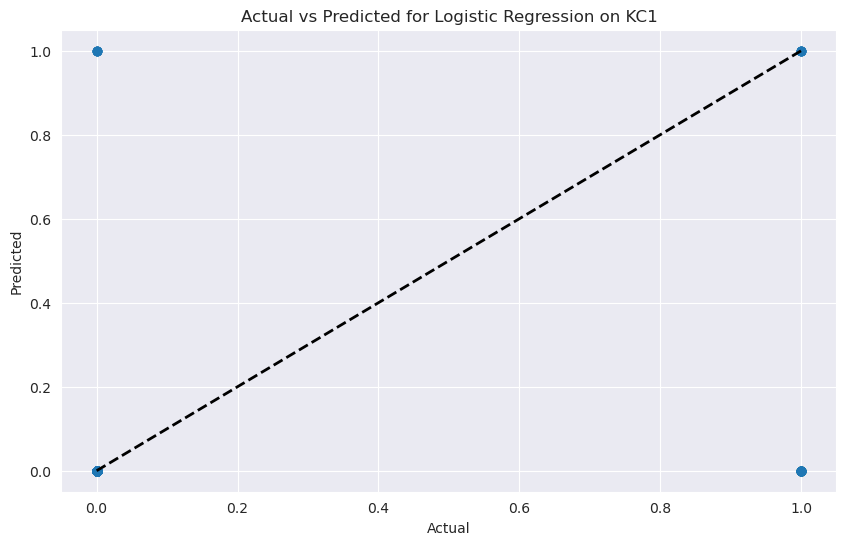

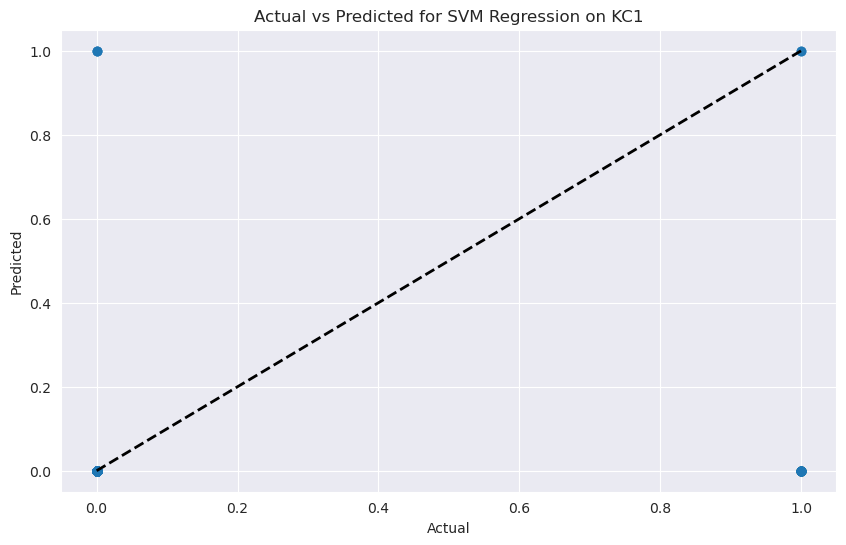

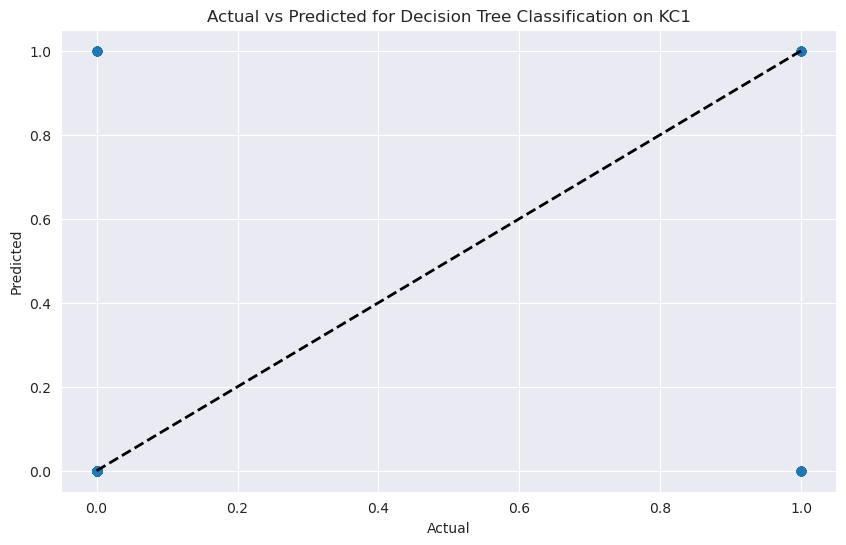

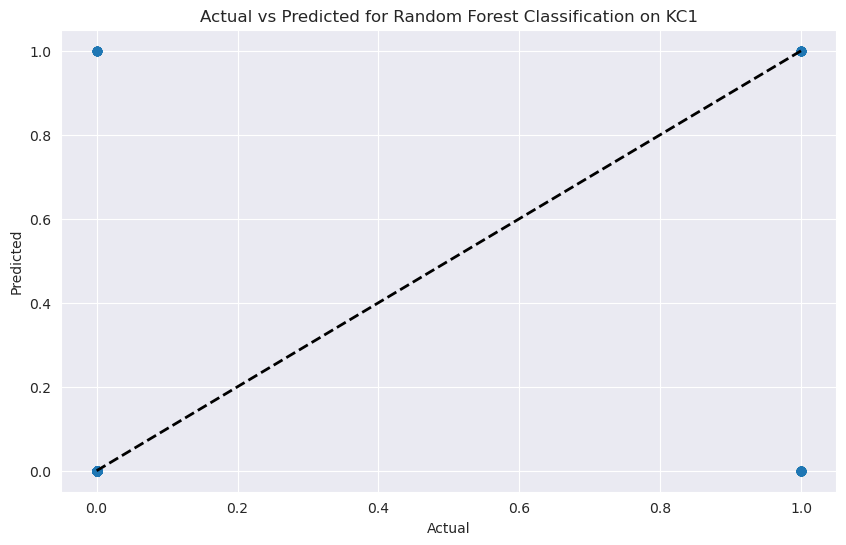

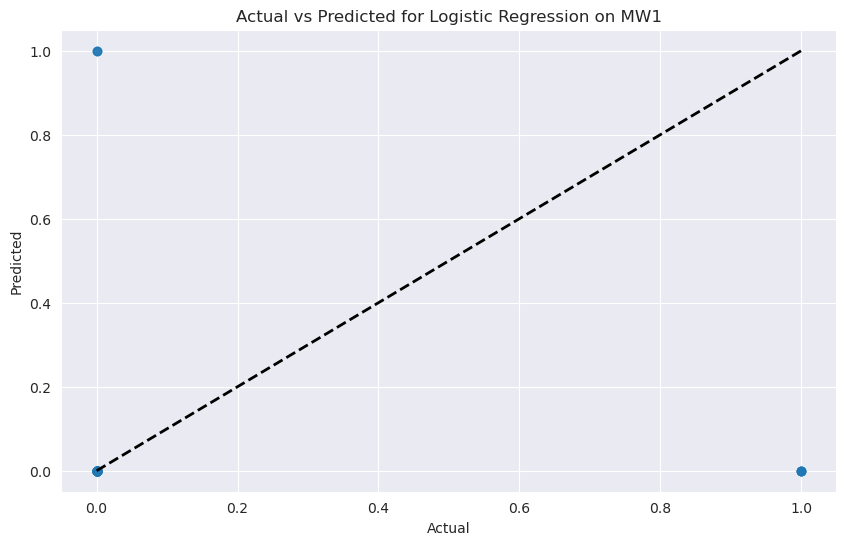

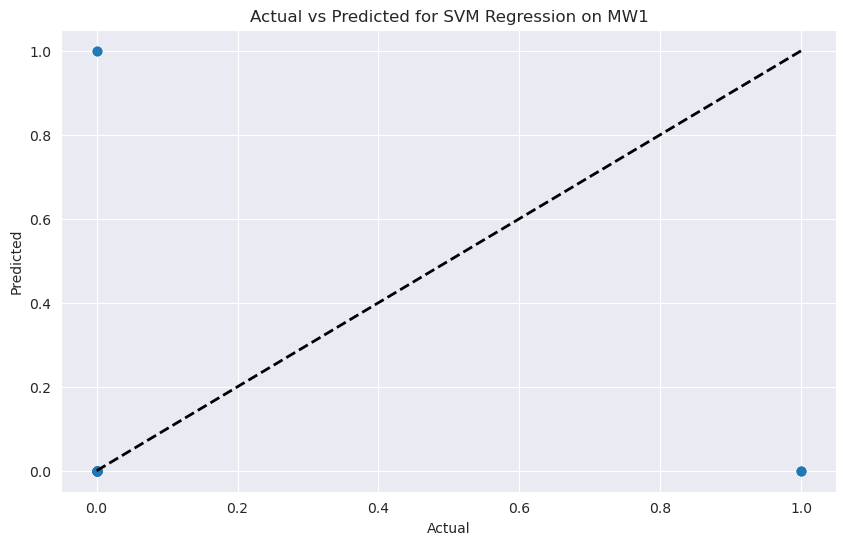

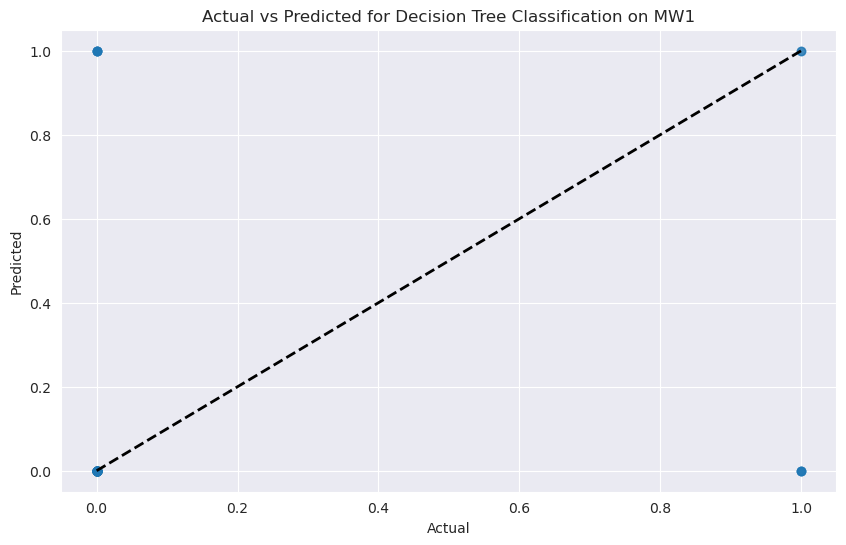

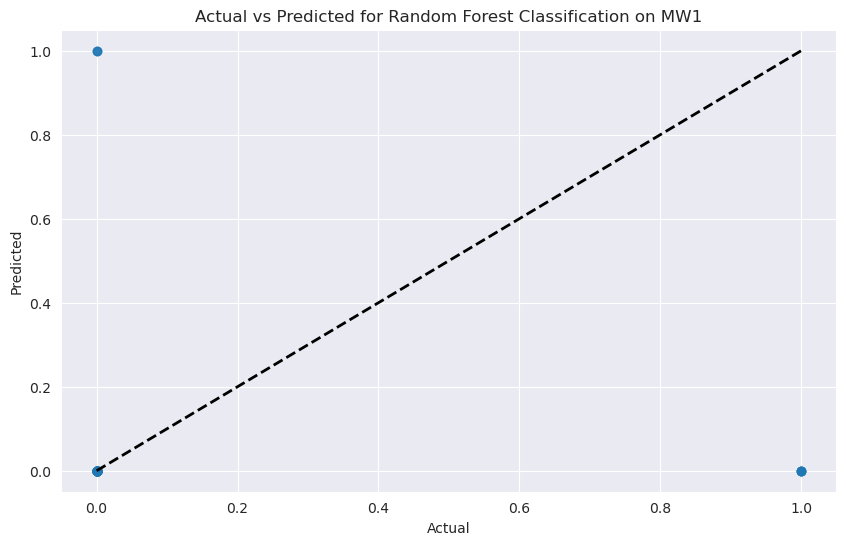

/home/akash-soam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


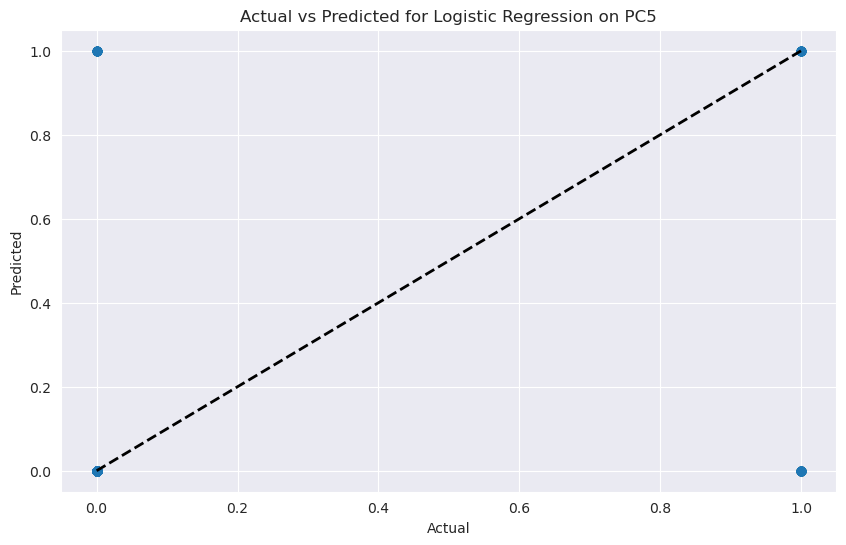

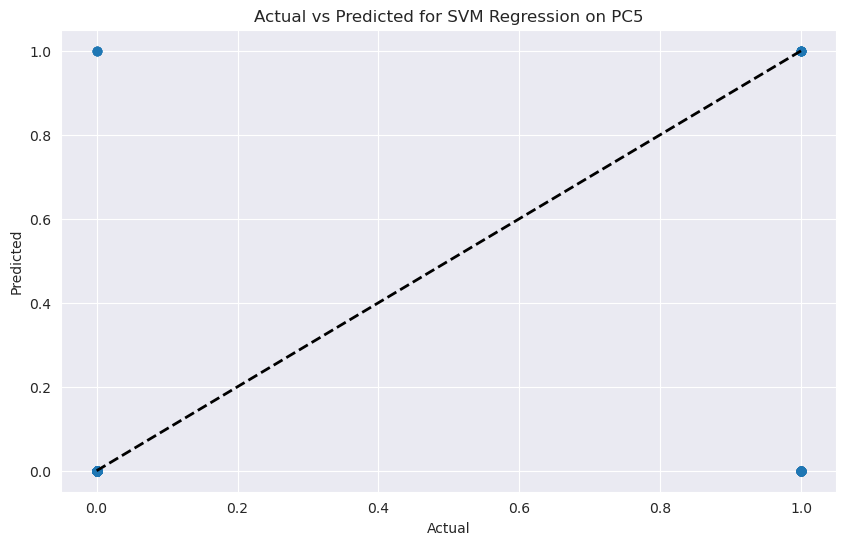

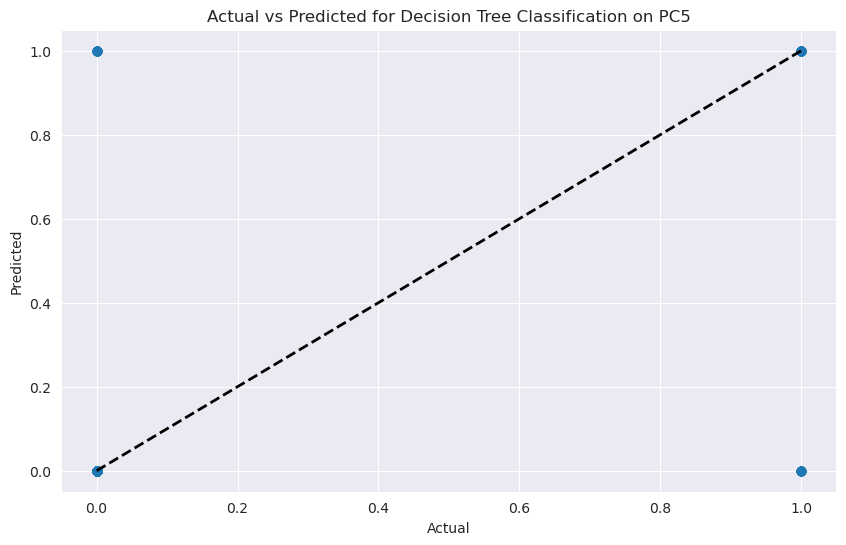

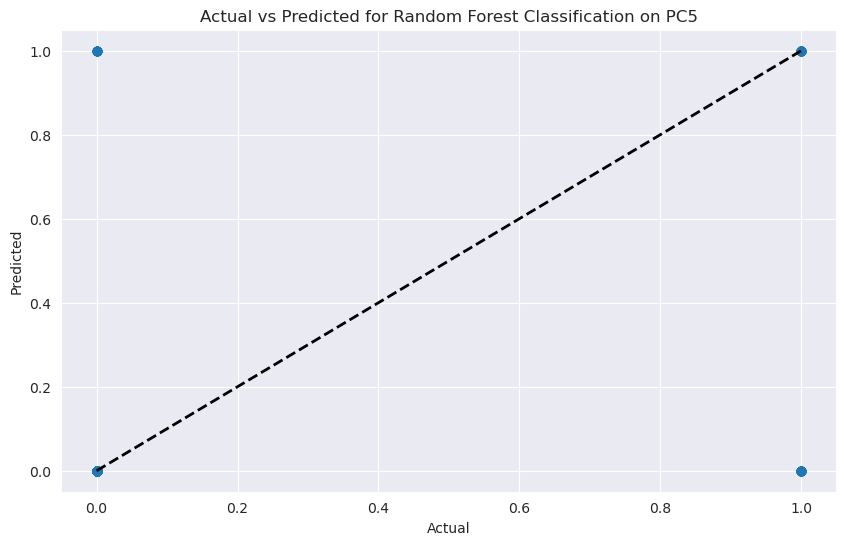

/home/akash-soam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


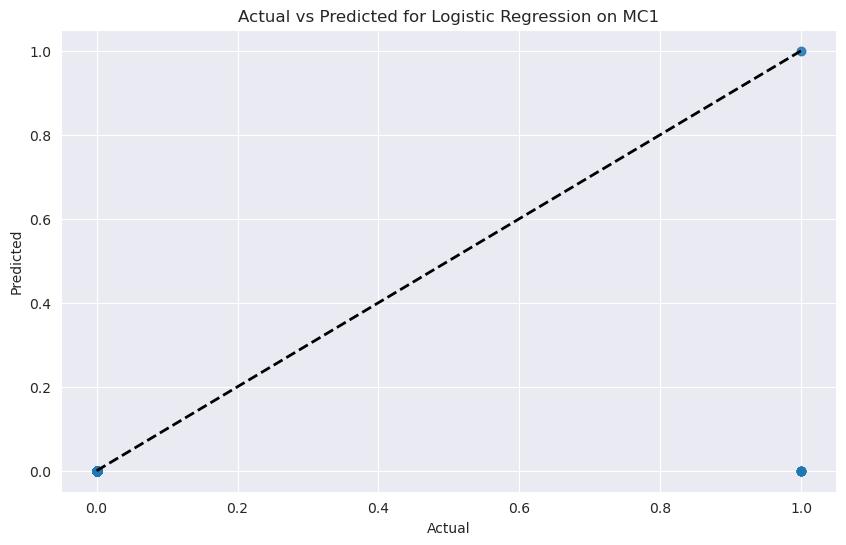

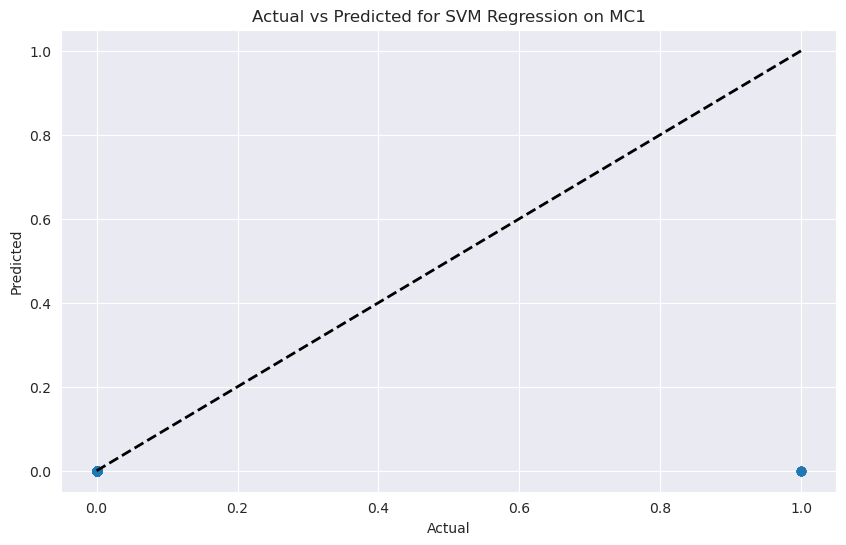

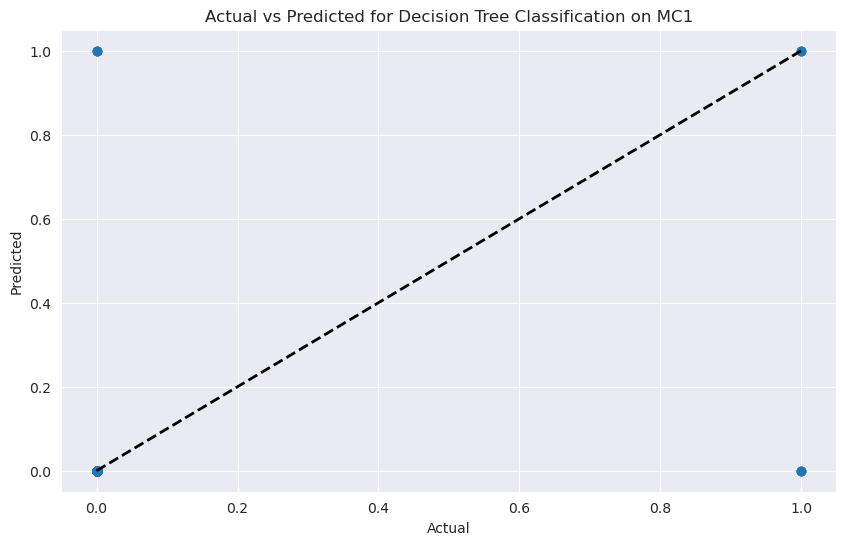

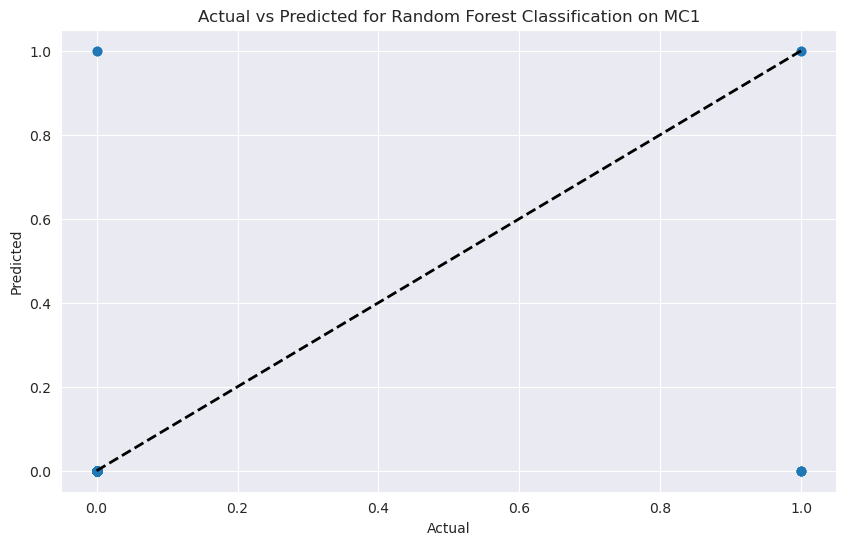

In [169]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name} on {dataset_name}')
    plt.show()

# Plot graphs for each model on each dataset
datasets = {
    'KC1': (X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1),
    'MW1': (X_train_mw1, X_test_mw1, y_train_mw1, y_test_mw1),
    'PC5': (X_train_pc5, X_test_pc5, y_train_pc5, y_test_pc5),
    'MC1': (X_train_mc1, X_test_mc1, y_train_mc1, y_test_mc1)
}

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plot_actual_vs_predicted(y_test, y_pred, model_name, dataset_name)

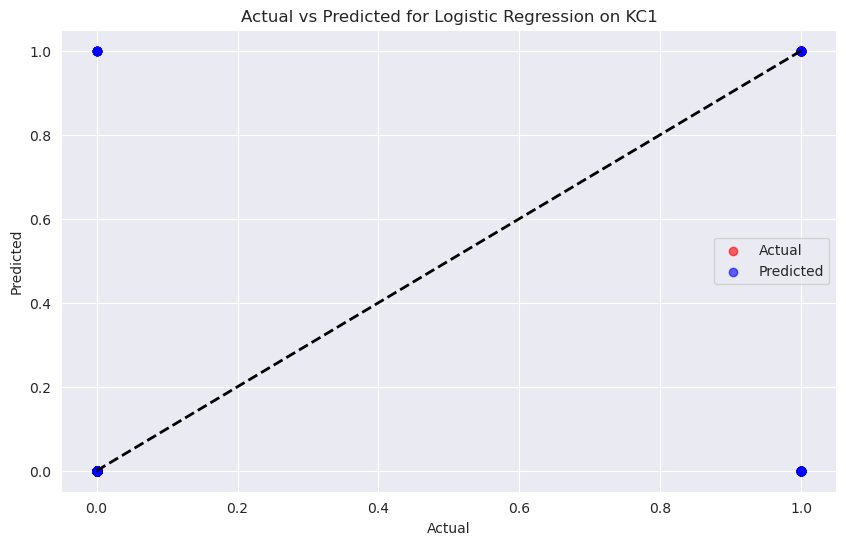

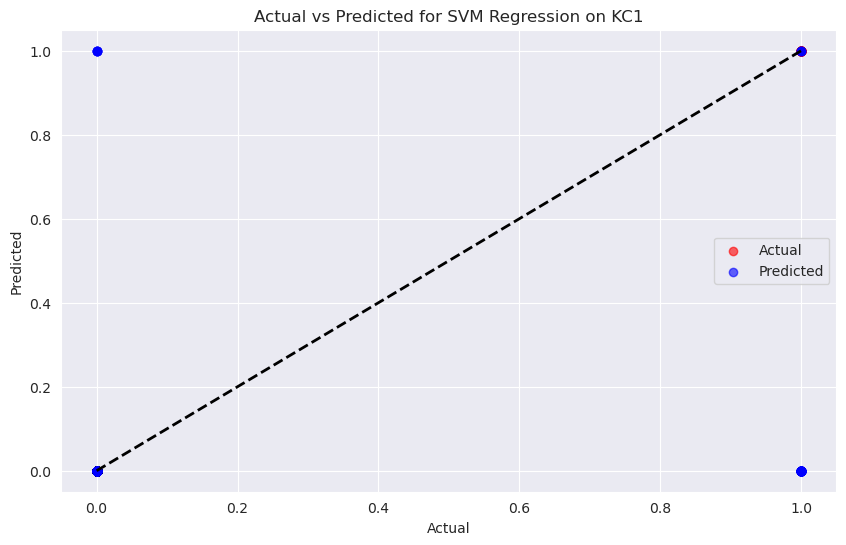

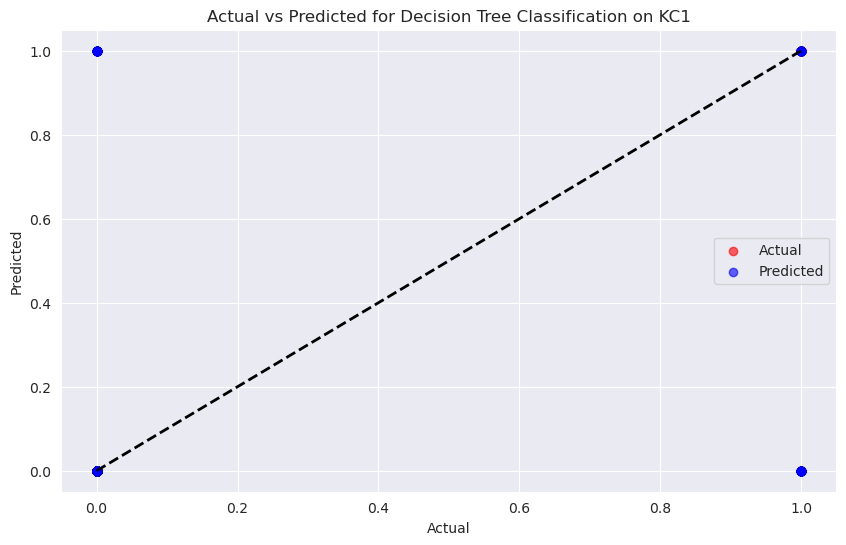

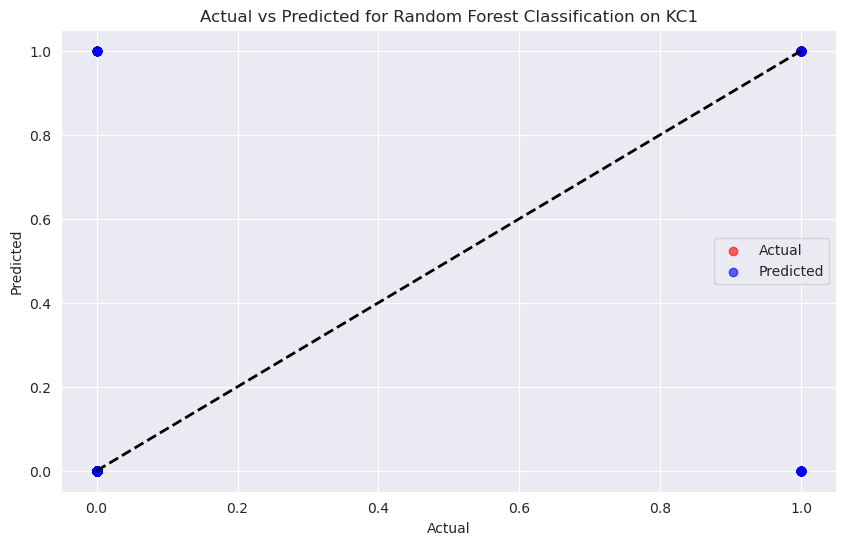

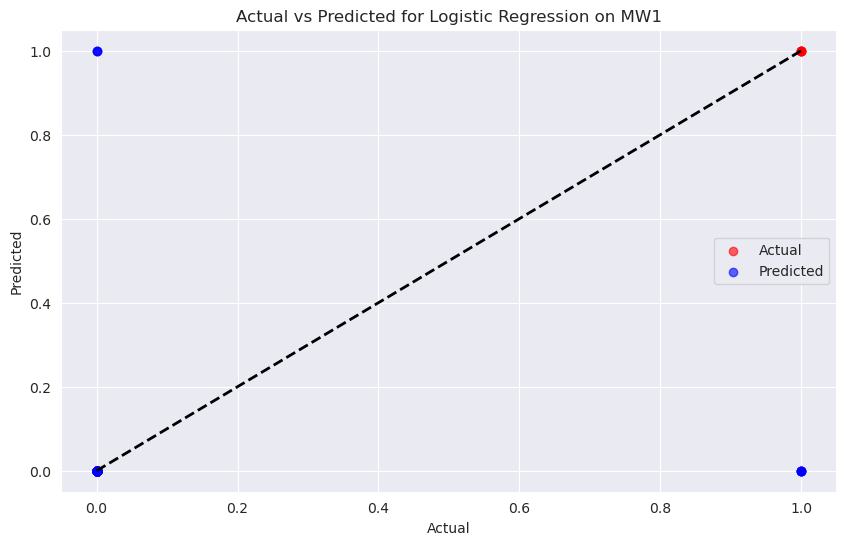

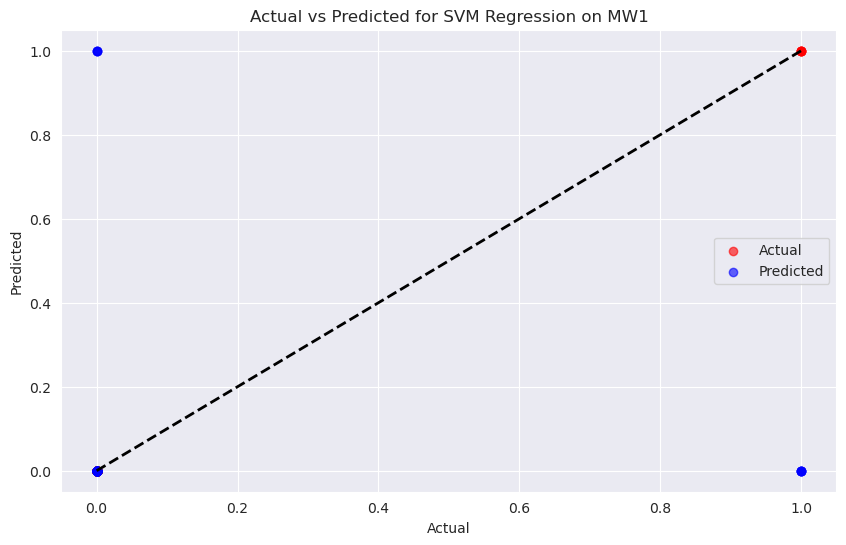

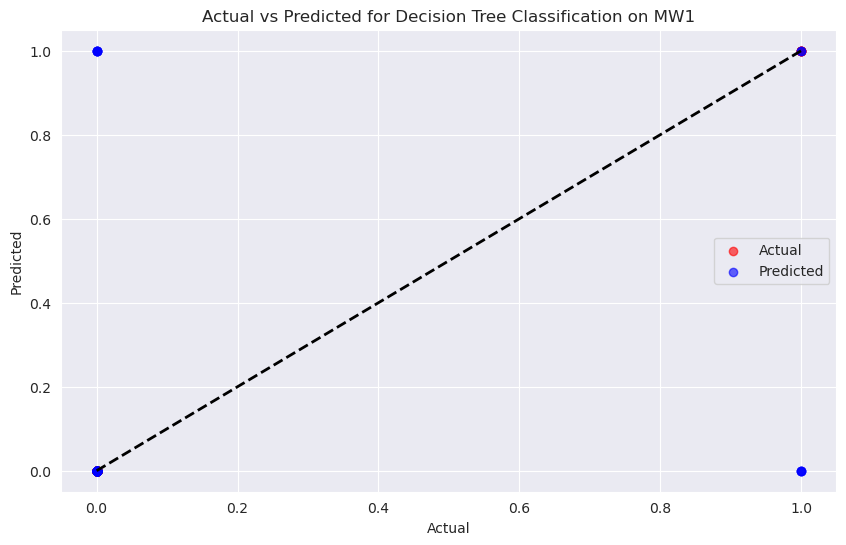

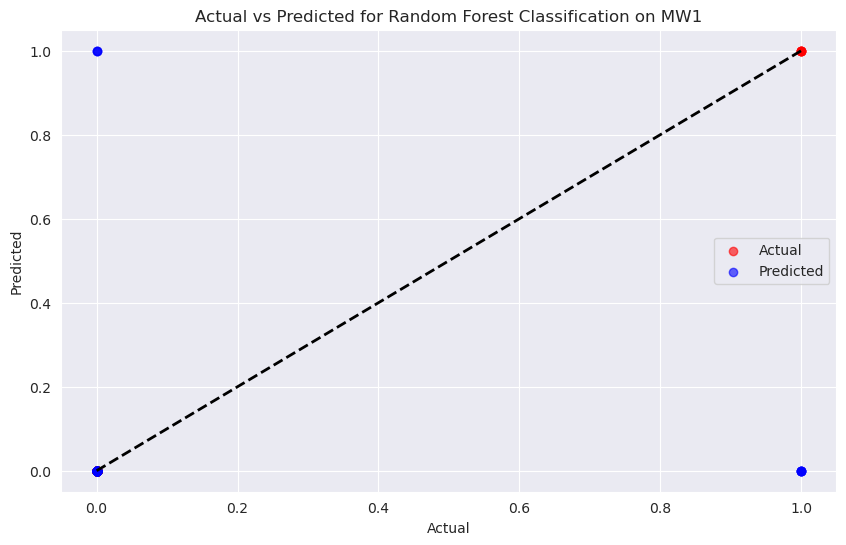

/home/akash-soam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


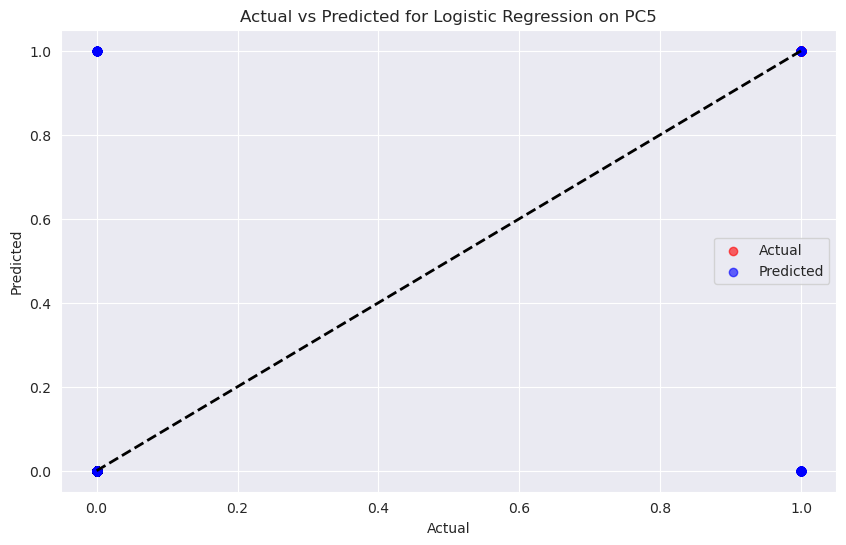

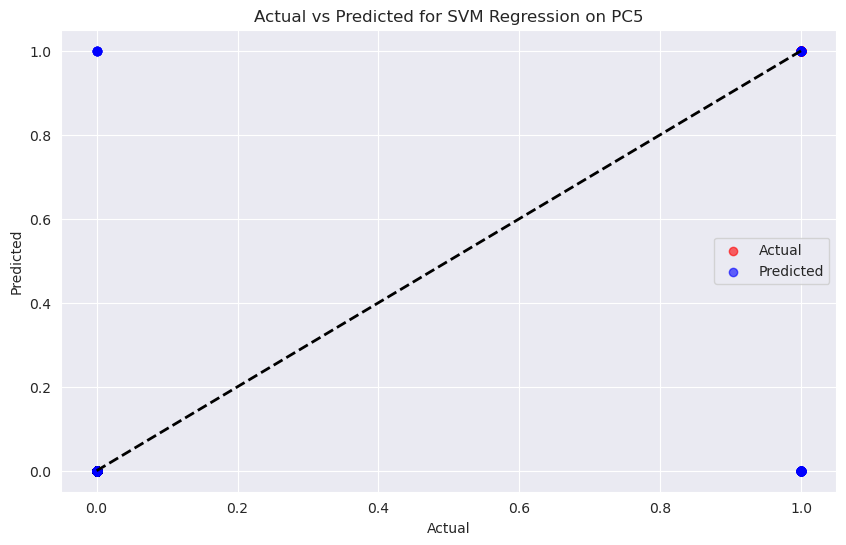

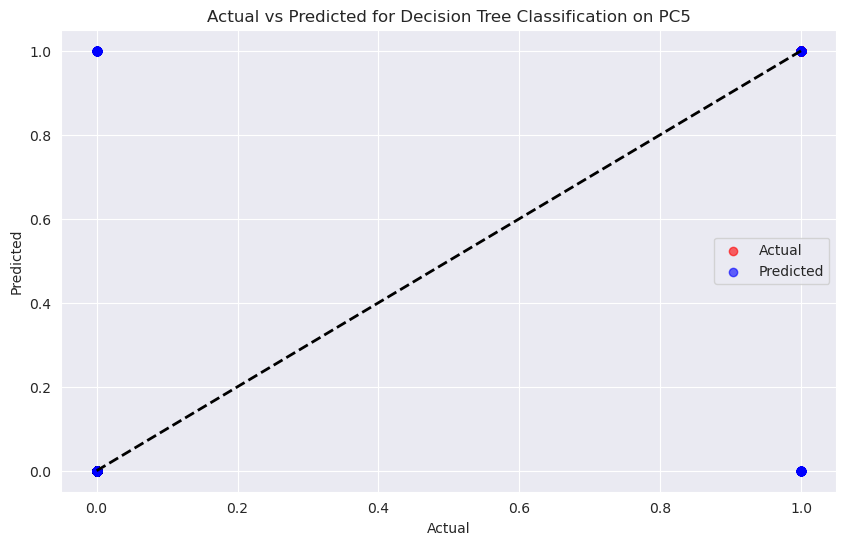

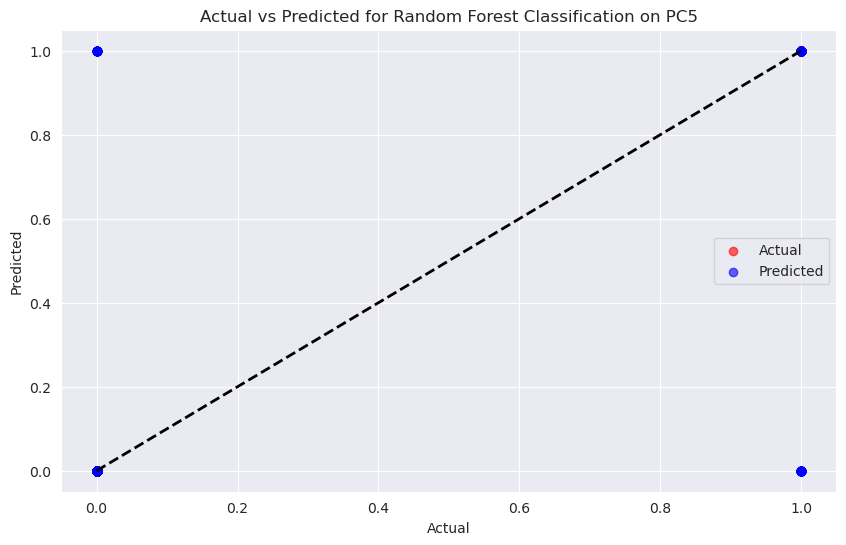

/home/akash-soam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


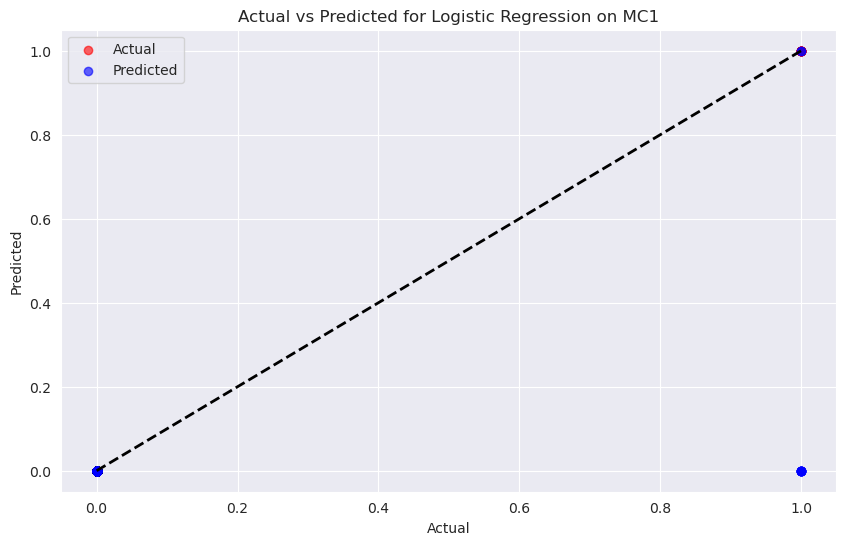

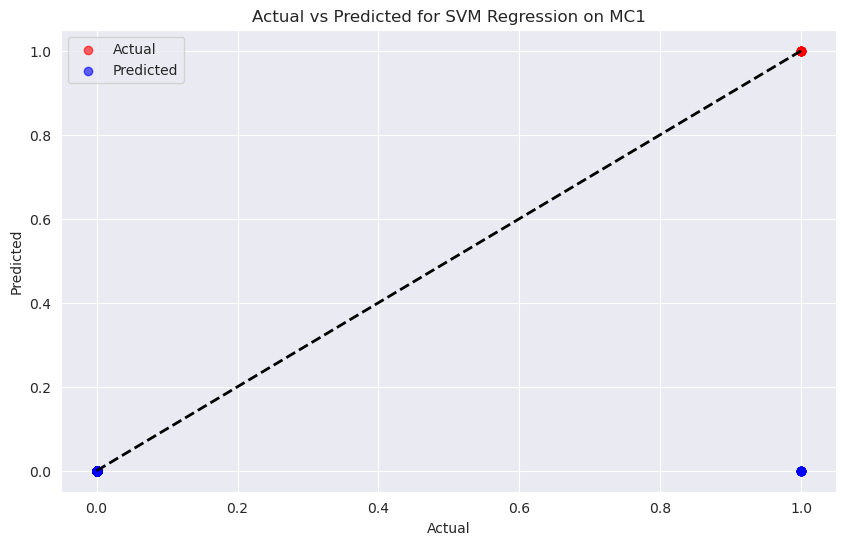

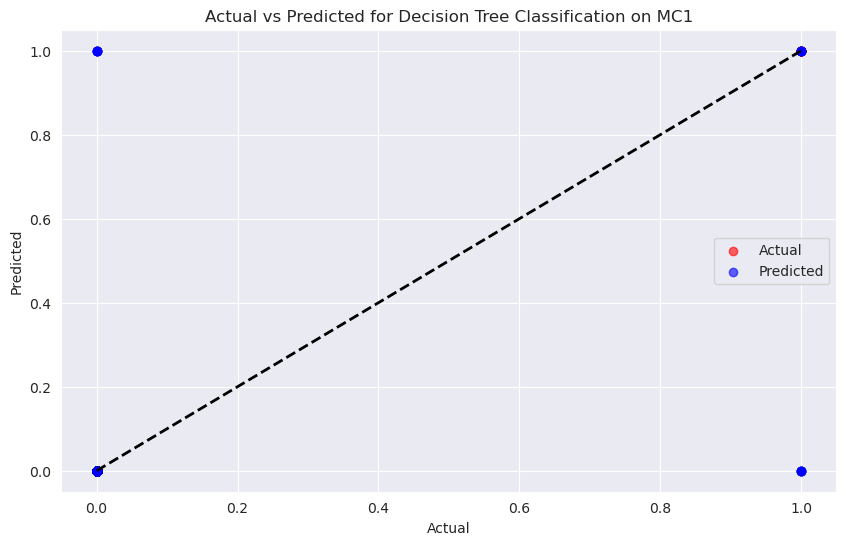

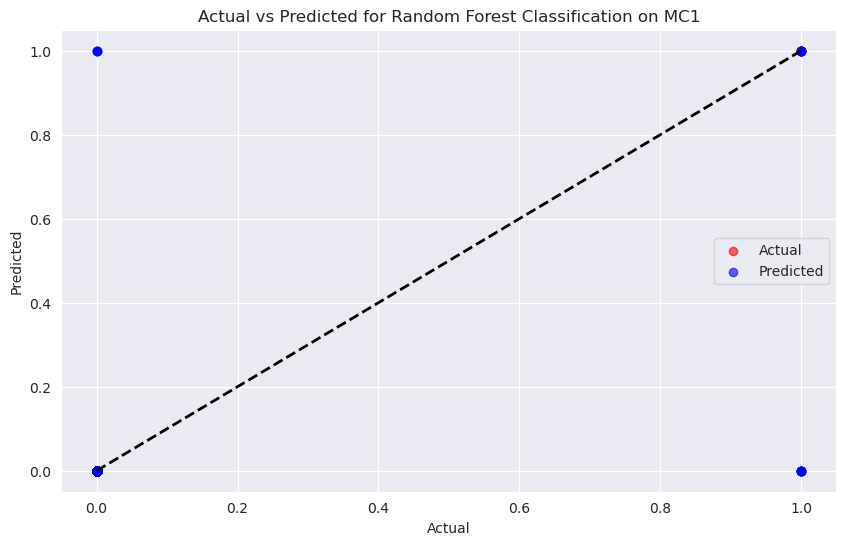

In [171]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values with red and blue dots
def plot_actual_vs_predicted(y_true, y_pred, model_name, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_true, color='red', alpha=0.6, label='Actual')
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6, label='Predicted')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name} on {dataset_name}')
    plt.legend()
    plt.show()

# Plot graphs for each model on each dataset
datasets = {
    'KC1': (X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1),
    'MW1': (X_train_mw1, X_test_mw1, y_train_mw1, y_test_mw1),
    'PC5': (X_train_pc5, X_test_pc5, y_train_pc5, y_test_pc5),
    'MC1': (X_train_mc1, X_test_mc1, y_train_mc1, y_test_mc1)
}

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plot_actual_vs_predicted(y_test, y_pred, model_name, dataset_name)